# **Support** **Vector** **Machines** **Tutorial** 

This tutorial series is intended to give you all the necessary tools to really understand the math behind SVM and It's implementation.

### What is the goal of the Support Vector Machine (SVM)?
  The goal of a support vector machine is to find  the optimal separating hyperplane which maximizes the margin of the training data.

  




### What is a separating hyperplane?
***Given a particular data point (weight and size), is the person a man or a woman ?***

Just by looking at the plot, we can see that it is possible to separate the data.  For instance, we could trace a line and then all the data points representing men will be above the line, and all the data points representing women will be below the line.

Such a line is called a separating **hyperplane** and is depicted below:
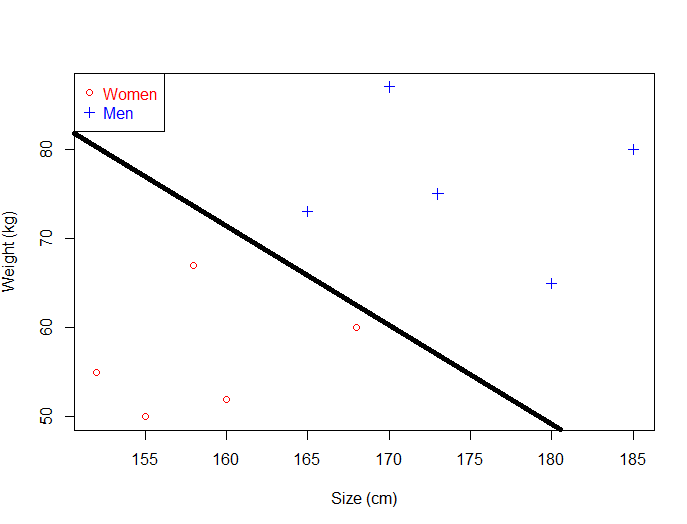


### What is the optimal separating hyperplane?
The fact that you can find a separating hyperplane,  does not mean it is the best one !  In the example below there is several separating hyperplanes. Each of them is valid as it successfully separates our data set with men on one side and women on the other side.

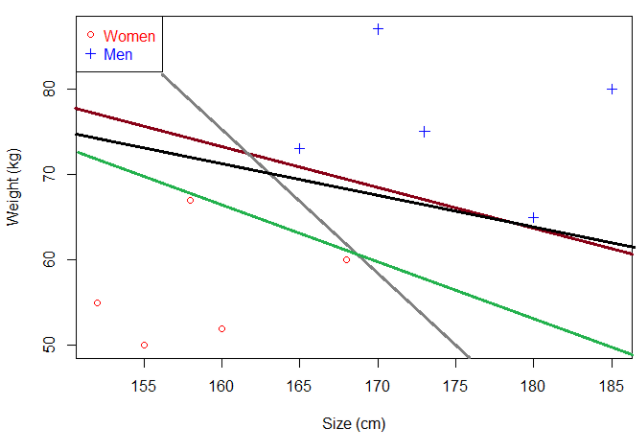

So we will try to select an hyperplane as far as possible from data points from each category:
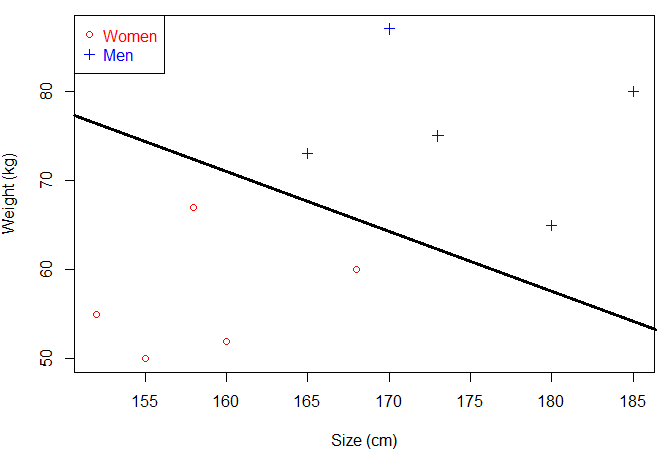

That's why the objective of a SVM is to find the optimal separating hyperplane:


*   because it correctly classifies the training data
*   and because it is the one which will generalize better with unseen data



### What is the margin and how does it help choosing the optimal hyperplane?
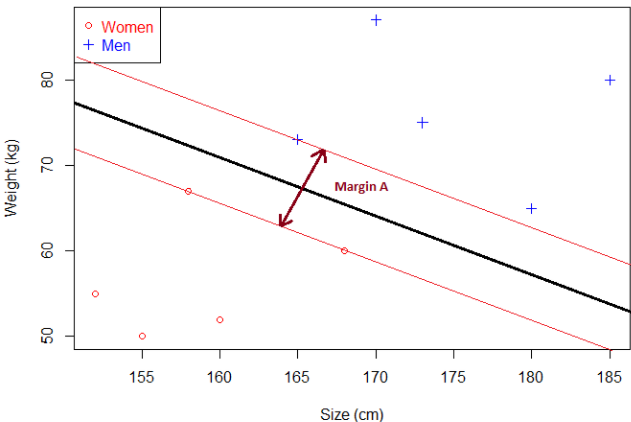

Given a particular hyperplane, we can compute the distance between the hyperplane and the closest data point. Once we have this value, if we double it we will get what is called the margin.
Basically the margin is a no man's land. There will never be any data point inside the margin.
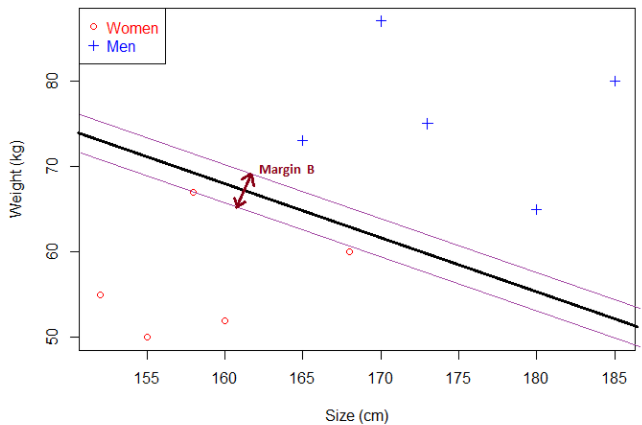

If an hyperplane is very close to a data point, its margin will be small.
The further an hyperplane is from a data point, the larger its margin will be.
This means that the optimal hyperplane will be the one with the biggest margin.

That is why the objective of the SVM is to find  the optimal separating hyperplane which maximizes the margin of the training data.

# ---------------------------------------------------------------------------- 

### How can we find the biggest margin  ?
1.   You have a dataset
2.  select two hyperplanes which separate the data with no points between them
3. maximize their distance (the margin)







#### Step 1: You have a dataset D and you want to classify it
Most of the time your data will be composed of n vectors xi.

Each xi will also be associated with a value yi indicating if the element belongs to the class (+1) or not (-1).

Note that yi  can only have two possible values -1 or +1.

The more formal definition of an initial dataset in set theory is :

            **D={ (xi,yi) ∣ xi ∈ Rp , yi ∈ {−1,1} } | i=1 to n**

#### Step 2: You need to select two hyperplanes separating the data with no points between them

Any hyperplane can be written as the set of points x satisfying w⋅x+b=0 .

Given two 3-dimensional vectors        w(b,−a,1) and x(1,x,y)
                  
                  w⋅x = b*(1) + (−a)*x + 1×y
                       w⋅x = y − ax + b       -->     (1)

Given two 2-dimensional vectors w′(−a,1) and x′(x,y)

                        w′⋅x′ = (−a)*x + 1*y
                        w′⋅x′= y − ax         -->      (2)

Now if we add b on both side of the equation (2) we got :

                   w′⋅x′+b=y−ax+b
                    w′⋅x′+b=w⋅x               -->      (3)
For the rest of this article we will use 2-dimensional vectors (as in equation (2)).

Given a hyperplane H0 separating the dataset and satisfying:

                                 w⋅x+b=0 
We can select two others hyperplanes H1 and H2 which also separate the data and have the following equations :

                                 w⋅x+b=1 
and

                                 w⋅x+b=−1 
Now we want to be sure that they have no points between them.

We won't select any hyperplane, we will only select those who meet the two following constraints:

For each vector xi either :

                     w⋅xi+b≥1    for xi having the class1   -->  (4)
or

                     w⋅xi+b≤−1   for xi having the class−1  -->  (5)

And multiply both sides by yi (which is always -1 in this equation)

                     yi(w⋅xi+b)≥yi(−1)
Which means equation (5) can also be written:

                   yi(w⋅xi+b)≥1  for xi having the class−1  -->  (6)
In equation (4), as yi=1 it doesn't change the sign of the inequation.

                   yi(w⋅xi+b)≥1  for xi having the class1   -->  (7)
We combine equations (6) and (7) :

                   yi(w⋅xi+b)≥1   for all 1≤i≤n  -->(8)                     


#### Step 3: Maximize the distance between the two hyperplanes

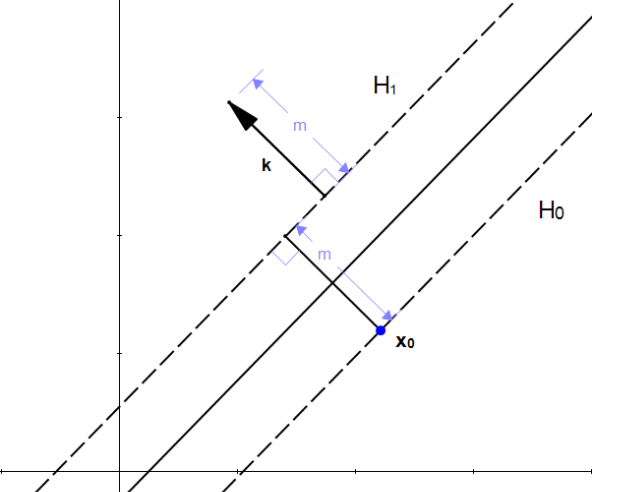

                           k = m*u = m*w/∥w∥                 -->(9)

If we start from the point x0 and add k we find that the point z0=x0+k is in the hyperplane H1

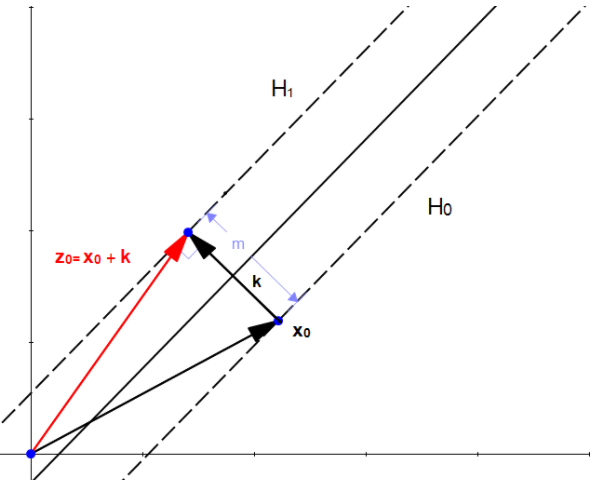

The fact that z0 is in H1 means that

                        w⋅z0+b=1         -->  (10)

We can replace z0 by x0+k because that is how we constructed it.

                        w⋅(x0+k)+b=1     -->  (11)

We can now replace k using equation (9)

                   w⋅(x0 + m * w/∥w∥ )+b=1  --> (12)

We now expand equation (12)

                   w⋅x0 + m* w⋅w * ∥w∥+b=1   --> (13)

The dot product of a vector with itself is the square of its norm so :

                    w⋅x0 + m*∥w∥**2/∥w∥+b=1  --> (14)
                    w⋅x0 +m*∥w∥ +b=1         --> (15)
                    w⋅x0 +b = 1−m*∥w∥        --> (16)

As x0 is in H0 then w⋅x0+b=−1

                    −1 = 1− m*∥w∥            --> (17)
                     m*∥w∥ = 2               --> (18)
                     m = 2/∥w∥               --> (19)

This is it ! We found a way to compute m.

# ----------------------------------------------------------------------------

## Now , We can implement our SVM Algorithm 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in self.data[i]] for i in self.data]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')


        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


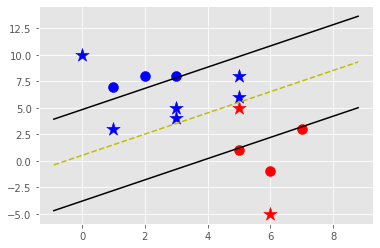

In [ ]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)


svm.visualize()


In [ ]:
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]), 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

# 1- EDA

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.io import loadmat
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt


### Upload the data

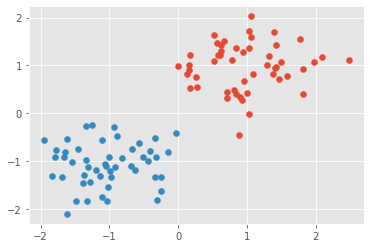

In [ ]:
x1 = np.random.normal(1, .5, (50,2))
x2 = np.random.normal(-1, .5, (50,2))
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

dic2 = {-1.: x1, 1.:x2}

Optimized a step.
Optimized a step.
Optimized a step.
[0.5148431  1.09546776] : 3.885778743487805
[1.46306281 0.71464821] : 5.263681495868003
[0.83772351 1.37328505] : 5.344542884819614
[0.58133194 1.20848138] : 4.321691448809404
[1.8207838  0.92012339] : 6.631375035034349
[0.84592717 0.39647801] : 2.992338327077271
[0.7134623  0.45358449] : 2.809334290077387
[1.02396191 1.72339714] : 6.64704303197005
[0.90540848 0.34469455] : 3.0110321763428955
[1.97613925 1.06341592] : 7.356626614356917
[1.38245787 0.81504083] : 5.311734857682708
[ 1.03788159 -0.02439001] : 2.4364331970990905
[0.62235741 1.42329625] : 4.942986836841715
[1.57998664 0.77228345] : 5.687589393053618
[1.81514455 0.41147062] : 5.382442771974673
[1.03139286 1.35799054] : 5.777717203942336
[1.41963227 0.96510389] : 5.76643161413491
[0.95490875 0.6693202 ] : 3.9195781301539396
[0.12561899 0.82655755] : 2.287532704803124
[1.4992361  1.06148143] : 6.193793511176514
[0.6647324  1.51092034] : 5.2586830669141476
[1.00206911 0.4324

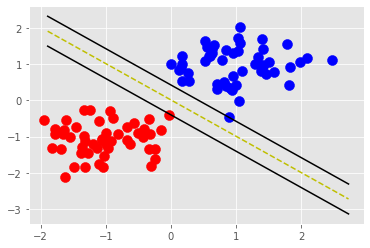

In [ ]:
svm = Support_Vector_Machine()
svm.fit(data=dic2)
svm.visualize()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
# Check the outliers
plt.style.use('ggplot')
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [ ]:
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [7,7]);

In [ ]:
labels = ['0','1']
print(df.shape)
dfy.value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

In [ ]:
df.corrwith(dfy['y'])

## 2. Split the data

In [ ]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=44, shuffle =True)

In [ ]:
#Applying SVC Model 

SVCModel = SVC(kernel= 'linear',max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

In [ ]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

In [ ]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

## Uderfiting and Overfiting

In [ ]:
def plotData(X,y,S):
    pos = (y == 1 ).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0],X[pos,1],s=S,c='b',marker='+',linewidths = 1)
    plt.scatter(X[neg,0],X[neg,1],s=S,c='r',marker='o',linewidths = 1)

In [ ]:
def plot_svc(svc,X,y,h=0.02,pad=0.25):
    x_min , x_max = X[:,0].min()-pad , X[:,0].max()+pad
    y_min , y_max = X[:,1].min()-pad , X[:,1].max()+pad
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z= svc.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha = 0.2)
    plotData(X,y,50)
    
    sv = svc.support_vectors_
    plt.scatter(sv[:,0],sv[:,1],c='y',marker='|',s=100,linewidths = 1)
    plt.xlim(x_min , x_max)
    plt.ylim(y_min , y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print("number of support vectors = ", svc.support_.size)

In [ ]:
plotData(x1,y1,50)

In [ ]:
# cA + B
# small C --> UnderFit
clf = svm.SVC(C=1.0, kernel = 'linear')
clf.fit(x1,y1.ravel())
plot_svc(clf,x1,y1)

In [ ]:
# big C --> OverFit
clf = svm.SVC(C=100, kernel = 'linear')
clf.fit(x1,y1.ravel())
plot_svc(clf,x1,y1)

## References


1.   https://www.coursera.org/lecture/machine-learning/optimization-objective-sHfVT
2.   https://www.syncfusion.com/succinctly-free-ebooks/support-vector-machines-succinctly
3.   https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

